# ML Final Project - MSDS University of Chicago
## TEAM : 12
1. Rishab Mohan
2. Hasan
3. Yujata

In [ ]:
print("\nAbout Fashion-MNIST Dataset:")
print("Source - https://pjreddie.com/projects/mnist-in-csv/")
print("This is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.") 
print("Each example is a 28x28 grayscale image, associated with a label from 10 classes.")
print("Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels.")
print("Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel,")
print("with higher numbers meaning darker.")
print("This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns.") 
print("The first column consists of the class labels (as mentioned below) and represents the article of clothing.")
print("The rest of the columns contain the pixel-values of the associated image.")
print("Labels:")
print("0: T-shirt/top")
print("1: Trouser")
print("2: Pullover")
print("3: Dress")
print("4: Coat")
print("5: Sandal")
print("6: Shirt")
print("7: Sneaker")
print("8: Bag")
print("9: Ankle boot")


### Import Necessary Packages

In [14]:
import pandas as pd 
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
from tensorflow.keras import backend as K
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.manifold import TSNE


## 0. Load the Fashion Data

In [16]:
# Reading the datasets
train_mnist_dataset = pd.read_csv('/Users/yujata/ML/Final project/fashion-mnist_train.csv')
print("Train Dataset Shape:", train_mnist_dataset.shape)
train_mnist_dataset.head()

Train Dataset Shape: (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Train-Validation-Test Split

In [17]:
# Split features (X) and labels (y)
X_full = train_mnist_dataset.iloc[:, 1:]
y_full = train_mnist_dataset.iloc[:, 0]
# Split full dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (48000, 784)
Shape of y_train: (48000,)
Shape of x_test: (12000, 784)
Shape of y_test: (12000,)


## 2. Preprocessing Data

In [18]:
# Reshape and normalize training, validation, and testing features
x_train = x_train.values.reshape(-1, 28, 28, 1).astype('float32') / 255.
x_test = x_test.values.reshape(-1, 28, 28, 1).astype('float32') / 255.

# Convert labels to integers
y_train = y_train.values.astype('int')
y_test = y_test.values.astype('int')

# Print the shapes and maximum values of the datasets
print('Training:', x_train.shape, x_train.max())
print('Testing:', x_test.shape, x_test.max())

Training: (48000, 28, 28, 1) 1.0
Testing: (12000, 28, 28, 1) 1.0


### Exploring  and visualisng each partition

In [19]:

# Reorganize by groups for training, validation, and testing sets
## It creates a list of arrays where each array contains all the instances of a particular class (label) set
train_groups = [x_train[np.where(y_train == i)[0]] for i in np.unique(y_train)] 
test_groups = [x_test[np.where(y_test == i)[0]] for i in np.unique(y_train)]

# Print the number of instances for each class in training, validation, and testing sets
print('Training groups:', [x.shape[0] for x in train_groups])
print('Testing groups:', [x.shape[0] for x in test_groups])

# Requirement for above step:
# Data Analysis: It helps in understanding the distribution of classes in your dataset.
# Imbalanced Datasets: If your dataset has imbalanced classes, this step can help identify which classes have fewer instances.
# Data Augmentation: You might want to apply different augmentation techniques or sampling strategies to different classes based on their distribution.

Training groups: [4768, 4826, 4800, 4758, 4815, 4859, 4757, 4776, 4851, 4790]
Testing groups: [1232, 1174, 1200, 1242, 1185, 1141, 1243, 1224, 1149, 1210]


+-------------+----------------------+---------------------+
| Class       |   Training Instances |   Testing Instances |
+=============+======================+=====================+
| T-shirt/top |                 4768 |                1232 |
+-------------+----------------------+---------------------+
| Trouser     |                 4826 |                1174 |
+-------------+----------------------+---------------------+
| Pullover    |                 4800 |                1200 |
+-------------+----------------------+---------------------+
| Dress       |                 4758 |                1242 |
+-------------+----------------------+---------------------+
| Coat        |                 4815 |                1185 |
+-------------+----------------------+---------------------+
| Sandal      |                 4859 |                1141 |
+-------------+----------------------+---------------------+
| Shirt       |                 4757 |                1243 |
+-------------+---------

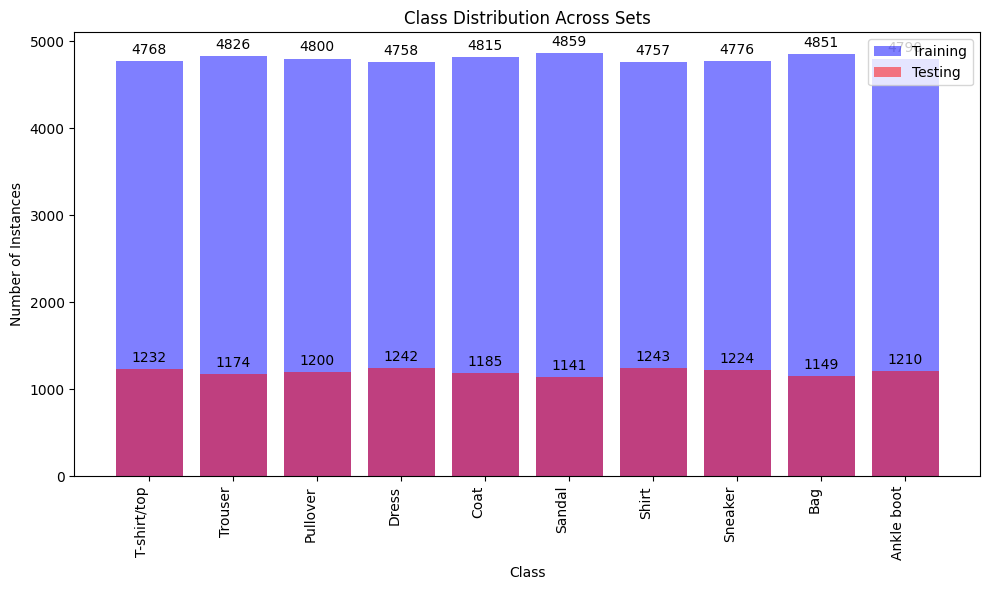

In [20]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
classes = list(range(10))

# Prepare data for tabulation
data = []
for i, cls in enumerate(classes):
    data.append([class_labels[cls],
                 train_groups[i].shape[0],
                 test_groups[i].shape[0]])

# Distribution Table 
headers = ["Class", "Training Instances",  "Testing Instances"]
print(tabulate(data, headers=headers, tablefmt="grid"))

# Plotting
plt.figure(figsize=(10, 6))
train_counts = [x.shape[0] for x in train_groups]
test_counts = [x.shape[0] for x in test_groups]

# Create bars
train_bar = plt.bar(classes, train_counts, alpha=0.5, color='b', label='Training')
test_bar = plt.bar(classes, test_counts, alpha=0.5, color='r', label='Testing')

# Add data labels
for bar in train_bar:
    height = bar.get_height()
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), 
                 textcoords="offset points", 
                 ha='center', va='bottom')

for bar in test_bar:
    height = bar.get_height()
    plt.annotate(f'{height}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), 
                 textcoords="offset points", 
                 ha='center', va='bottom')

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution Across Sets')
plt.xticks(classes, class_labels, rotation=90, ha="right")
plt.legend()
plt.tight_layout()
plt.show()


## 3. Creating Bactch Generator
1.  Batch generation is crucial for training Siamese neural networks for image similarity because it allows the model to learn from pairs of images efficiently. 
2.  In a Siamese network, the model takes two images as input and learns to output a similarity score indicating how similar or dissimilar the two images are.

In [22]:
def generate_siamese_batch(image_groups, batch_halfsize=8):
    batch_images_a, batch_images_b, batch_scores = [], [], []
    all_groups = list(range(len(image_groups)))
    for match_group in [True, False]:
        group_indices = np.random.choice(all_groups, size=batch_halfsize)
        batch_images_a += [image_groups[group_idx][np.random.choice(range(image_groups[group_idx].shape[0]))] for group_idx in group_indices]
        if match_group:
            b_group_indices = group_indices
            batch_scores += [1] * batch_halfsize
        else:
            # Selecting groups different from the same group
            non_group_indices = [np.random.choice([i for i in all_groups if i != group_idx]) for group_idx in group_indices]
            b_group_indices = non_group_indices
            batch_scores += [0] * batch_halfsize

        batch_images_b += [image_groups[group_idx][np.random.choice(range(image_groups[group_idx].shape[0]))] for group_idx in b_group_indices]

    return np.stack(batch_images_a, 0), np.stack(batch_images_b, 0), np.stack(batch_scores, 0)

# Generate siamese batch for training
siamese_batch_images_a_train, siamese_batch_images_b_train, siamese_batch_scores_train = generate_siamese_batch(train_groups, batch_halfsize=8)

# Generate siamese batch for testing
siamese_batch_images_a_test, siamese_batch_images_b_test, siamese_batch_scores_test = generate_siamese_batch(test_groups, batch_halfsize=8)


### Validating data from Generator

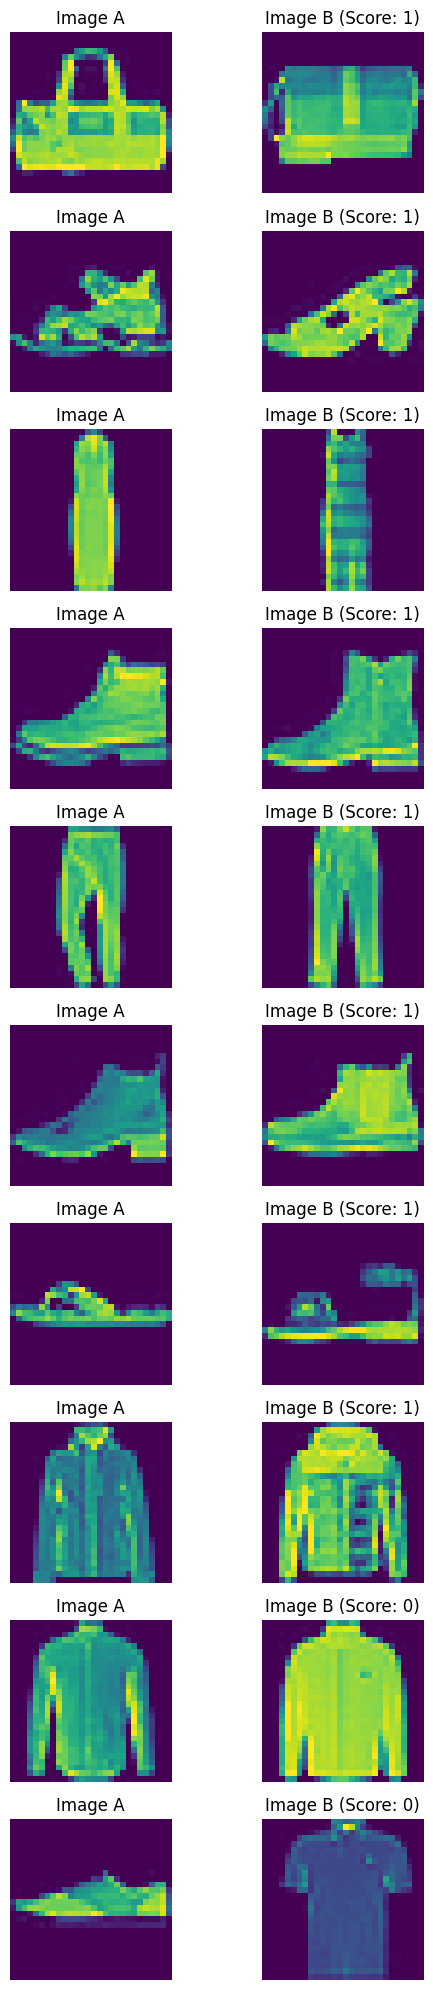

In [23]:
def visualize_siamese_samples(sample_images_a, sample_images_b, sample_scores):
    num_samples = len(sample_images_a)
    fig, axes = plt.subplots(nrows=num_samples, ncols=2, figsize=(6, 2*num_samples))
    for i in range(num_samples):
        axes[i, 0].imshow(sample_images_a[i])
        axes[i, 0].set_title('Image A')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(sample_images_b[i])
        axes[i, 1].set_title(f'Image B (Score: {sample_scores[i]})')
        axes[i, 1].axis('off')
    plt.tight_layout()
    plt.show()

# Visualize sample pairs from training data
visualize_siamese_samples(siamese_batch_images_a_train[:10], siamese_batch_images_b_train[:10], siamese_batch_scores_train[:10])

## 4. Creating network for Feature generation using CNN architecture
1.  The network consists of convolutional layers followed by max-pooling layers to extract features from the input images.
2.  The extracted features are then flattened and passed through fully connected (dense) layers to generate the final feature vector.

In [24]:

# Defines CNN architecture for feature generation
def create_feature_generation_network(input_shape, activation='relu'):
    # Sequential model allows you to create models layer-by-layer
    model = models.Sequential([
        # Convolutional layer with 32 filters of size (3, 3), using specified activation function
        layers.Conv2D(32, (3, 3), activation=activation, input_shape=input_shape),
        # Max pooling layer with pool size (2, 2)
        layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters of size (3, 3), using specified activation function
        layers.Conv2D(64, (3, 3), activation=activation),
        # Max pooling layer with pool size (2, 2)
        layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters of size (3, 3), using specified activation function
        layers.Conv2D(64, (3, 3), activation=activation),
        # Flattening layer to flatten the input
        layers.Flatten(),
        # Fully connected (dense) layer with 64 neurons, using specified activation function
        layers.Dense(64, activation=activation),
        # Fully connected (dense) layer with 32 neurons, using specified activation function
        layers.Dense(32, activation=activation),
        # Fully connected (dense) layer with 16 neurons, using specified activation function
        layers.Dense(16, activation=activation),
        # Fully connected (dense) layer with 8 neurons (output layer), using specified activation function
        layers.Dense(8, activation=activation),  # Output layer
    ])
    return model


input_shape = (28, 28, 1)
# Experiment with different activation functions
activation_functions = ['relu', 'sigmoid', tf.nn.leaky_relu]

for activation_func in activation_functions:
    # Create feature generation network with specified activation function
    feature_generation_network = create_feature_generation_network(input_shape, activation=activation_func)
    print(f"\nFeature Generation Network with {activation_func} activation:")
    feature_generation_network.summary()


/usr/local/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Feature Generation Network with relu activation:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,416 (372.72 KB)

 Trainable params: 95,416 (372.72 KB)

 Non-trainable params: 0 (0.00 B)


Feature Generation Network with sigmoid activation:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,416 (372.72 KB)

 Trainable params: 95,416 (372.72 KB)

 Non-trainable params: 0 (0.00 B)


Feature Generation Network with <function leaky_relu at 0x159053600> activation:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,416 (372.72 KB)

 Trainable params: 95,416 (372.72 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Building Siamese model with different activation functions

In [25]:
# Function to build Siamese model
def build_siamese_model(input_shape, activation='relu'):
    # Create two instances of the feature generation network
    feature_generation_network_a = create_feature_generation_network(input_shape, activation=activation)
    feature_generation_network_b = create_feature_generation_network(input_shape, activation=activation)
    
    # Input layers for image pairs
    input_a = layers.Input(shape=input_shape)
    input_b = layers.Input(shape=input_shape)
    
    # Generate feature vectors for both images
    feature_vector_a = feature_generation_network_a(input_a)
    feature_vector_b = feature_generation_network_b(input_b)
    
    # Calculate L1 distance between feature vectors using custom layer
    distance = DistanceLayer()([feature_vector_a, feature_vector_b])
    
    # Output layer
    output = layers.Dense(1, activation='sigmoid')(distance)
    
    # Combine inputs and output into a Siamese model
    siamese_model = models.Model(inputs=[input_a, input_b], outputs=output)
    
    return siamese_model

# Custom layer to calculate L1 distance

# L1 distance, also known as Manhattan distance, is a measure of the absolute differences between corresponding elements of two vectors in a vector space.
# In the context of the Siamese model, the L1 distance is computed between the feature vectors extracted from two input images. 
# It provides a measure of similarity or dissimilarity between the images based on the absolute differences in their feature representations.

class DistanceLayer(layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def call(self, inputs):
        x, y = inputs
        return tf.abs(x - y)


input_shape = (28, 28, 1)

# Build Siamese model with ReLU activation
siamese_model_relu = build_siamese_model(input_shape, activation='relu')
print("Siamese Model with ReLU Activation:")
siamese_model_relu.summary()

# Build Siamese model with Sigmoid activation
siamese_model_sigmoid = build_siamese_model(input_shape, activation='sigmoid')
print("\nSiamese Model with Sigmoid Activation:")
siamese_model_sigmoid.summary()

# Build Siamese model with Leaky ReLU activation
siamese_model_leaky_relu = build_siamese_model(input_shape, activation=tf.nn.leaky_relu)
print("\nSiamese Model with Leaky ReLU Activation:")
siamese_model_leaky_relu.summary()

Siamese Model with ReLU Activation:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 8)         │     95,416 │ input_layer_5[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 8)         │     95,416 │ input_layer_6[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer      │ (None, 8)         │          0 │ sequential_3[0][… │
│ (DistanceLayer)     │                   │            │ sequential_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 1)         │          9 │ distance_layer[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 190,841 (745.47 KB)

 Trainable params: 190,841 (745.47 KB)

 Non-trainable params: 0 (0.00 B)


Siamese Model with Sigmoid Activation:


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 8)         │     95,416 │ input_layer_9[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 8)         │     95,416 │ input_layer_10[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer_1    │ (None, 8)         │          0 │ sequential_5[0][… │
│ (DistanceLayer)     │                   │            │ sequential_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 1)         │          9 │ distance_layer_1… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 190,841 (745.47 KB)

 Trainable params: 190,841 (745.47 KB)

 Non-trainable params: 0 (0.00 B)


Siamese Model with Leaky ReLU Activation:


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 8)         │     95,416 │ input_layer_13[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 8)         │     95,416 │ input_layer_14[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ distance_layer_2    │ (None, 8)         │          0 │ sequential_7[0][… │
│ (DistanceLayer)     │                   │            │ sequential_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 1)         │          9 │ distance_layer_2… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 190,841 (745.47 KB)

 Trainable params: 190,841 (745.47 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the Siamese model
siamese_model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
siamese_model_sigmoid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
siamese_model_leaky_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


/var/folders/ld/q1czxsbd2fl10zwy_z_flk3h0000gn/T/ipykernel_74596/2137302598.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax2.set_title('Image B\nPredicted: %3.0f%%' % (100 * predicted))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


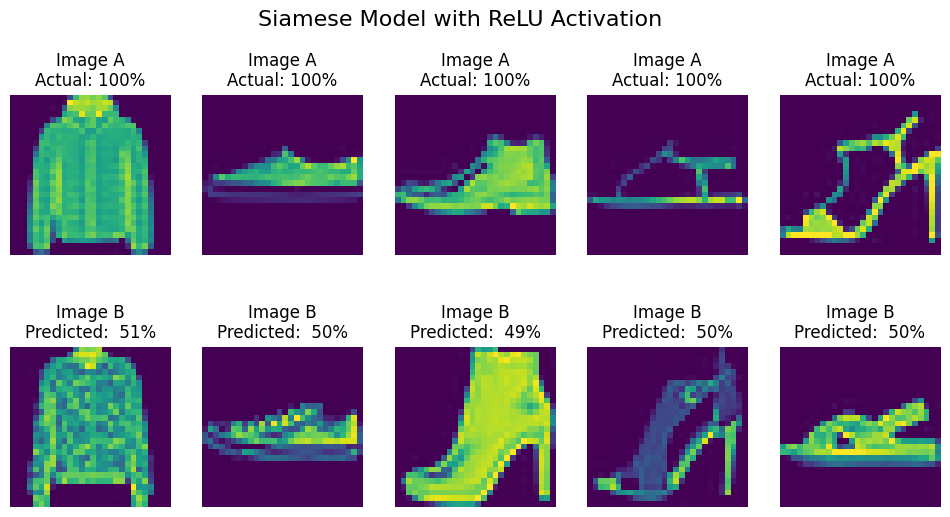

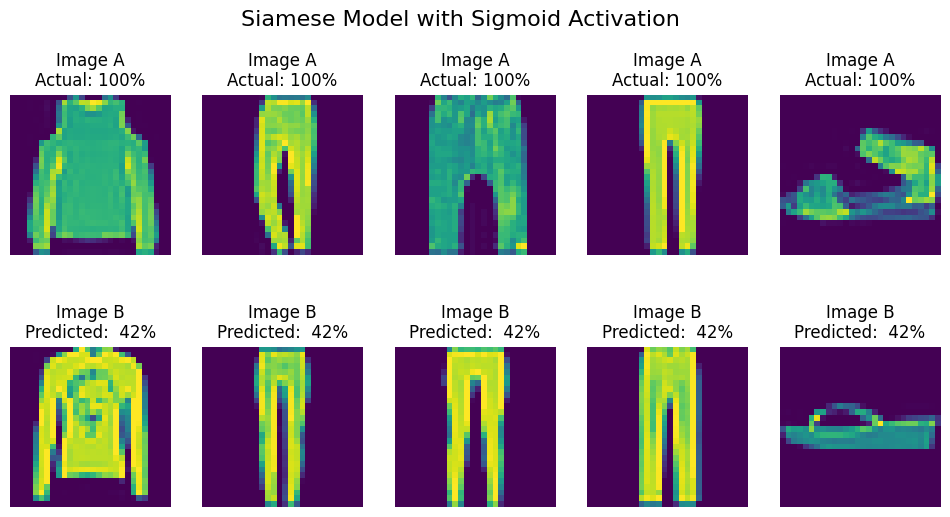

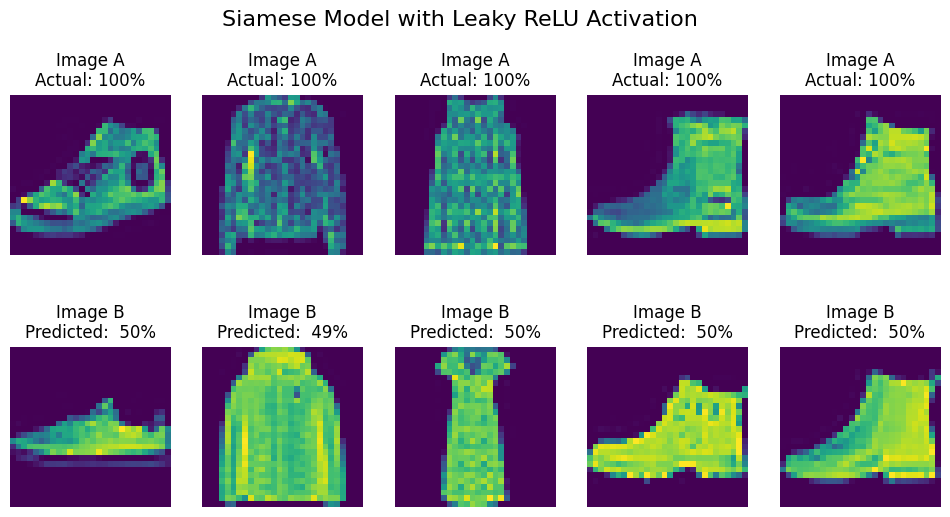

In [26]:
# Visualize model output for all three models
def visualize_model_output_all(siamese_models, activation_names, num_examples=5):
    figs = []
    for siamese_model, activation in zip(siamese_models, activation_names):
        img_batch_a, img_batch_b, actual_similarity = generate_siamese_batch(test_groups, batch_halfsize=num_examples)
        predicted_similarity = siamese_model.predict([img_batch_a, img_batch_b])
        num_examples = min(num_examples, img_batch_a.shape[0])  # Ensure num_examples doesn't exceed the batch size
        max_columns = min(num_examples, 5)  # Define the maximum number of columns
        fig, axs = plt.subplots(2, max_columns, figsize=(12, 6))  # Ensure num_examples doesn't exceed max_columns
        fig.suptitle(f'Siamese Model with {activation} Activation', fontsize=16)  # Set title for each figure
        for i, (img_a, img_b, actual, predicted) in enumerate(zip(img_batch_a, img_batch_b, actual_similarity, predicted_similarity)):
            if i >= max_columns:
                break
            ax1 = axs[0, i]
            ax1.imshow(img_a[:, :, 0])  
            ax1.set_title('Image A\nActual: %3.0f%%' % (100 * actual))
            ax1.axis('off')

            ax2 = axs[1, i]
            ax2.imshow(img_b[:, :, 0])  
            ax2.set_title('Image B\nPredicted: %3.0f%%' % (100 * predicted))
            ax2.axis('off')
        figs.append(fig)
    return figs

# List of Siamese models 
siamese_models = [siamese_model_relu, siamese_model_sigmoid, siamese_model_leaky_relu]
activation_names = ["ReLU", "Sigmoid", "Leaky ReLU"]

# Visualize output for all Siamese models
figs = visualize_model_output_all(siamese_models, activation_names)

for fig in figs:
    plt.show(fig)

## 6. Model Evalation on Test Data

In [29]:
K.clear_session()
tf.compat.v1.reset_default_graph()

# Evaluate the Siamese models on the test set
test_results_relu = siamese_model_relu.evaluate([siamese_batch_images_a_test, siamese_batch_images_b_test], siamese_batch_scores_test)
test_results_sigmoid = siamese_model_sigmoid.evaluate([siamese_batch_images_a_test, siamese_batch_images_b_test], siamese_batch_scores_test)
test_results_leaky_relu = siamese_model_leaky_relu.evaluate([siamese_batch_images_a_test, siamese_batch_images_b_test], siamese_batch_scores_test)

# Predict on test set
predictions_relu = siamese_model_relu.predict([siamese_batch_images_a_test, siamese_batch_images_b_test])
predictions_sigmoid = siamese_model_sigmoid.predict([siamese_batch_images_a_test, siamese_batch_images_b_test])
predictions_leaky_relu = siamese_model_leaky_relu.predict([siamese_batch_images_a_test, siamese_batch_images_b_test])

# Convert predictions to binary class labels
predictions_relu_classes = (predictions_relu > 0.5).astype(int)
predictions_sigmoid_classes = (predictions_sigmoid > 0.5).astype(int)
predictions_leaky_relu_classes = (predictions_leaky_relu > 0.5).astype(int)

# Calculate precision, recall, and F1 score for each model
precision_relu, recall_relu, f1_relu, _ = precision_recall_fscore_support(siamese_batch_scores_test, predictions_relu_classes, average='binary')
precision_sigmoid, recall_sigmoid, f1_sigmoid, _ = precision_recall_fscore_support(siamese_batch_scores_test, predictions_sigmoid_classes, average='binary')
precision_leaky_relu, recall_leaky_relu, f1_leaky_relu, _ = precision_recall_fscore_support(siamese_batch_scores_test, predictions_leaky_relu_classes, average='binary')

# Store metrics in a dictionary
metrics_dict = {
    'Model': ['ReLU', 'Sigmoid', 'Leaky ReLU'],
    'Precision': [precision_relu, precision_sigmoid, precision_leaky_relu],
    'Recall': [recall_relu, recall_sigmoid, recall_leaky_relu],
    'F1 Score': [f1_relu, f1_sigmoid, f1_leaky_relu],
    'Accuracy': [test_results_relu[1], test_results_sigmoid[1], test_results_leaky_relu[1]]
}
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - loss: 0.6935 - mae: 0.5001
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step - loss: 0.7067 - mae: 0.5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - loss: 0.6918 - mae: 0.4993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Precision,Recall,F1 Score,Accuracy
0,ReLU,0.5,0.875,0.636364,0.500089
1,Sigmoid,0.0,0.000,0.000000,0.500000
2,Leaky ReLU,0.0,0.000,0.000000,0.499298


### 6.1 Exploring the performance of model
Example K  Pullover vs Sandal Plot¶
Taking random Pullover and Sandal (categories 2 and 5) images and calculate the distance using our network to the other images

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


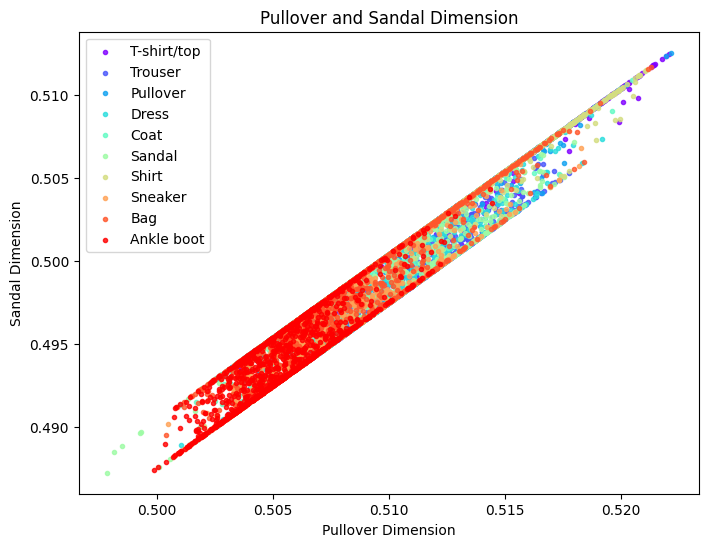

In [30]:
Pullover_vec = np.stack([train_groups[0][0]]*x_test.shape[0], 0)
Pullover_score = siamese_model_relu.predict([Pullover_vec, x_test], verbose=True, batch_size=128)
Sandal_vec = np.stack([train_groups[-1][0]]*x_test.shape[0], 0)
Sandal_score = siamese_model_relu.predict([Sandal_vec, x_test], verbose=True, batch_size=128)

obj_categories = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

plt.figure(figsize=(8, 6))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(Pullover_score[np.where(y_test == c_group), 0],
                Sandal_score[np.where(y_test == c_group), 0],  
                marker='.',
                color=c_color,
                linewidth=1,
                alpha=0.8,
                label=c_label)

plt.xlabel('Pullover Dimension')
plt.ylabel('Sandal Dimension')
plt.title('Pullover and Sandal Dimension')
plt.legend(loc='best')
plt.show(block=False)

## 7. Neighbor Visualization¶
For this we use the TSNE neighborhood embedding to visualize the features on a 2D plane and see if
it roughly corresponds to the groups. We use the test data for this example as well

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


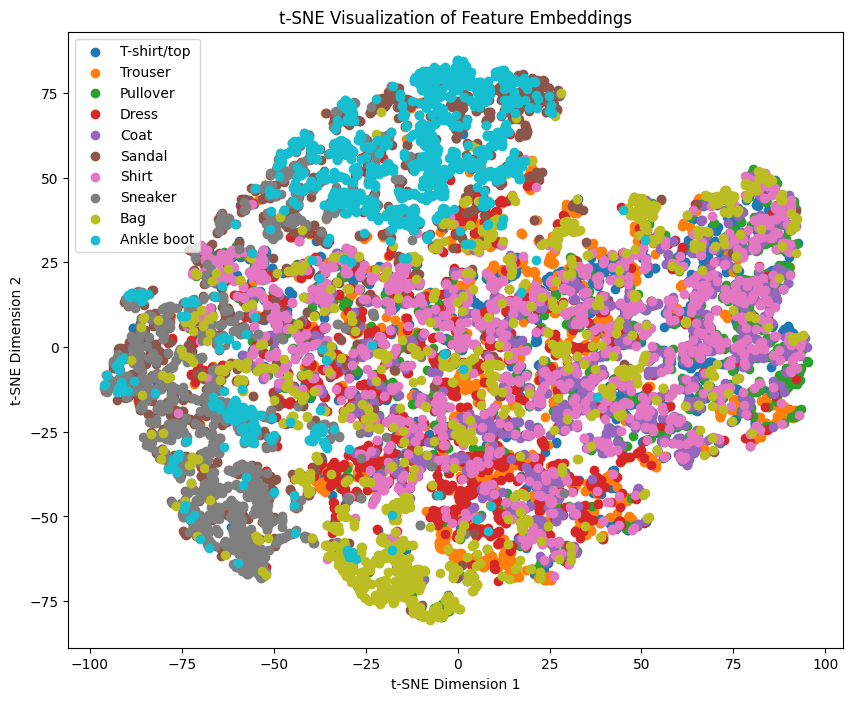

In [33]:

# Function to extract features from the data using the feature generation network
def extract_features(data, feature_generation_network):
    return feature_generation_network.predict(data)

# Extract features from the training data
x_test_features = extract_features(x_test, feature_generation_network)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
x_test_tsne = tsne.fit_transform(x_test_features)

# Labels
labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Get unique class labels
unique_classes = np.unique(y_train)

# Plot the t-SNE embeddings with separate colors for each class
plt.figure(figsize=(10, 8))
for class_label in unique_classes:
    # Get indices of samples belonging to the current class
    class_indices = np.where(y_test == class_label)[0]
    # Get t-SNE embeddings for samples of the current class
    class_embeddings = x_test_tsne[class_indices]
    # Plot the t-SNE embeddings with a unique color for each class
    plt.scatter(class_embeddings[:, 0], class_embeddings[:, 1], label=labels[class_label])

plt.title('t-SNE Visualization of Feature Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
